In [1]:
from ase.io import read
from ase.visualize import view
from funciones import get_molecules
atoms = read("pw.out")

view(atoms)

<Popen: returncode: None args: ['/home/hernan-barquero/anaconda3/envs/genera...>

In [2]:
from ase import Atoms
import numpy as np

# Identificadores de Al y Cl en el sistema
indices_Al = atoms.symbols.indices()["Al"]
indices_Cl = atoms.symbols.indices()["Cl"]

# Crear un array vacío para almacenar cada molécula de AlCl3
AlCl3_all = np.empty(len(indices_Al), dtype=object)

# Iterar sobre cada índice de Al
for i, idx_Al in enumerate(indices_Al):
    # Obtener los tres Cl asociados al Al correspondiente
    cl_indices = indices_Cl[i*3:(i+1)*3]
    
    # Crear la molécula de AlCl3 con posiciones en el espacio global (no relativo)
    simbolos = ["Al"] + ["Cl"] * 3
    posiciones = [atoms[idx_Al].position] + [atoms[idx].position for idx in cl_indices]
    
    # Crear el Atoms y asignar las posiciones originales
    AlCl3_all[i] = Atoms(symbols=simbolos, positions=posiciones, cell=atoms.cell, pbc=atoms.pbc)


# Identificadores de C, H y N
indices_C = atoms.symbols.indices()["C"]
indices_H = atoms.symbols.indices()["H"]
indices_N = atoms.symbols.indices()["N"]

# Número de moléculas de C6H11N2 basado en los índices
num_moleculas = len(indices_C) // 6

# Crear un array vacío para almacenar cada molécula de C6H11N2
C6H11N2_all = np.empty(num_moleculas, dtype=object)

# Iterar sobre el número de moléculas encontradas
for i in range(num_moleculas):
    # Seleccionar los índices para cada átomo
    c_indices = indices_C[i*6:(i+1)*6]
    h_indices = indices_H[i*11:(i+1)*11]
    n_indices = indices_N[i*2:(i+1)*2]
    
    # Construir los símbolos y las posiciones en el espacio global
    simbolos = ["C"] * 6 + ["H"] * 11 + ["N"] * 2
    posiciones = ([atoms[idx].position for idx in c_indices] + 
                 [atoms[idx].position for idx in h_indices] +
                 [atoms[idx].position for idx in n_indices])
    
    # Crear el objeto Atoms para cada molécula
    C6H11N2_all[i] = Atoms(symbols=simbolos, positions=posiciones, cell=atoms.cell, pbc=atoms.pbc)


In [3]:
# Identificadores de C, H y N
indices_C = atoms.symbols.indices()["C"]
indices_H = atoms.symbols.indices()["H"]
indices_N = atoms.symbols.indices()["N"]

# Número de moléculas de C6H11N2
num_moleculas = len(indices_C) // 6

# Crear un array vacío para almacenar los índices de cada molécula
C6H11N2_indices = np.empty(num_moleculas, dtype=object)

# Iterar sobre cada molécula
for i in range(num_moleculas):
    # Tomar los índices correspondientes
    c_indices = list(indices_C[i*6:(i+1)*6])
    h_indices = list(indices_H[i*11:(i+1)*11])
    n_indices = list(indices_N[i*2:(i+1)*2])
    
    # Guardar los índices en una lista
    C6H11N2_indices[i] = c_indices + h_indices + n_indices

# Identificadores de Al y Cl
indices_Al = atoms.symbols.indices()["Al"]
indices_Cl = atoms.symbols.indices()["Cl"]

# Número de moléculas de AlCl3
num_moleculas = len(indices_Al)

# Crear un array vacío para almacenar los índices de cada molécula de AlCl3
AlCl3_indices = np.empty(num_moleculas, dtype=object)

# Iterar sobre cada molécula
for i, idx_Al in enumerate(indices_Al):
    # Tomar los tres Cl asociados al Al correspondiente
    cl_indices = indices_Cl[i*3:(i+1)*3]
    
    # Guardar los índices en una lista
    AlCl3_indices[i] = [idx_Al] + list(cl_indices)


In [4]:
sol = get_molecules(["alcl3_opt.xyz", "1-Ethyl-3-methylimidazolium_chloride_opt.xyz"], "pw.out")

In [5]:
sol[0].idx_list

[0, 1, 2, 3]

In [6]:
center_of_masses = []
for i in range(len(sol)):
	center_of_masses.append(atoms.get_center_of_mass(scaled=False,indices= sol[i].idx_list))

center_of_masses[0][0]

np.float64(1.7108241537061073)

In [7]:
all_center_of_mass = atoms.get_center_of_mass(scaled=False)

In [8]:
center_of_masses_T = center_of_masses - all_center_of_mass

In [9]:
# Distancia radial al centro de masa de la mezcla donde se encuentran los centros de masa de las moleculas individuales
radius = []
for i in range(len(center_of_masses_T)):
	aux = np.sqrt(center_of_masses_T[i][0]**2 +center_of_masses_T[i][1]**2 +center_of_masses_T[i][2]**2)
	radius.append(aux)

radius

[np.float64(8.401678424214568),
 np.float64(3.6946812304015677),
 np.float64(4.512435198895137),
 np.float64(5.563683078588444),
 np.float64(6.886386990930103),
 np.float64(9.885621568463252),
 np.float64(4.508150926671006),
 np.float64(8.412588392358774),
 np.float64(9.083982606586565),
 np.float64(4.522732691394216),
 np.float64(8.201431158211761),
 np.float64(9.28043799809422),
 np.float64(6.041308929351049),
 np.float64(5.1254164431234415),
 np.float64(6.542752524265704),
 np.float64(7.126052823016811)]

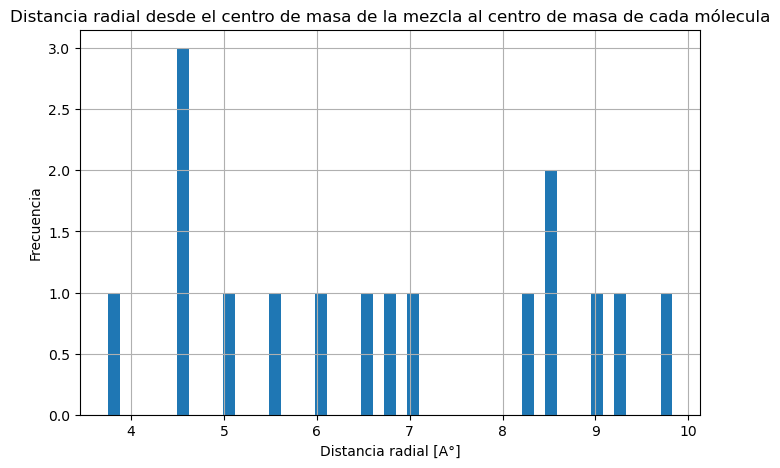

In [10]:
import matplotlib.pyplot as plt

x = np.linspace(np.min(radius), np.max(radius), len(radius))

fig, ax = plt.subplots(1,1, figsize = (8,5))

ax.hist(radius, bins=25,align='mid', rwidth=0.5)
ax.set_xlabel("Distancia radial [A°]")
ax.set_ylabel("Frecuencia")
ax.grid()
ax.set_title("Distancia radial desde el centro de masa de la mezcla al centro de masa de cada mólecula")
plt.savefig("prueba.png")